# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

**Independent Variables:**

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

**Dependent Variable (Target Variable):**

- Loan_Status

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [32]:
loan_status = pd.read_csv("loan_prediction.csv")
loan_status.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [33]:
loan_status.shape

(614, 13)

Dataset has 614 rows and 13 columns

In [34]:
loan_status.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

There is one identifier column loan id which needs to be removed.

In [35]:
loan_status.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

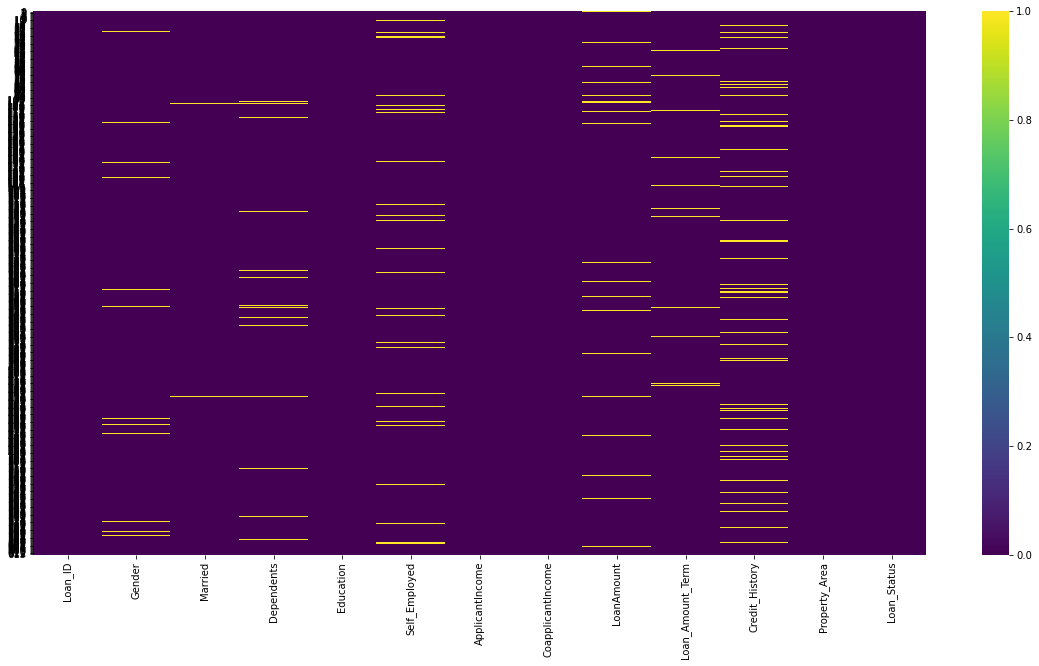

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(loan_status.isnull(),yticklabels=True,cbar=True,cmap='viridis')
plt.show()

There are null values present in 7 columns

In [37]:
loan_status.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 10 columns with object type data while others are numerical.

In [38]:
loan_status.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

There is skewness present in the dataset.

In [39]:
loan_status['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Data is imbalance

In [40]:
loan_status.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Loan amount and credit history has count less than 614, therefore it consists of missing values. Mean is higher in ApplicantIncome, CoapplicantIncome and LoanAmount than median while less in the last two columns which suggest skewness is present. Former case has right skewness and latter has left skewness present. Diffrence in Min, max and inter quartie range is variable which suggests presence of outliers.

In [67]:
#We separate categorical and continuous features

categorical=[i for i in loan_status.columns if loan_status[i].nunique()<11]
continues=[i for i in loan_status.columns if loan_status[i].nunique()>=11 and i!='Loan_ID']


### Univariate Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64

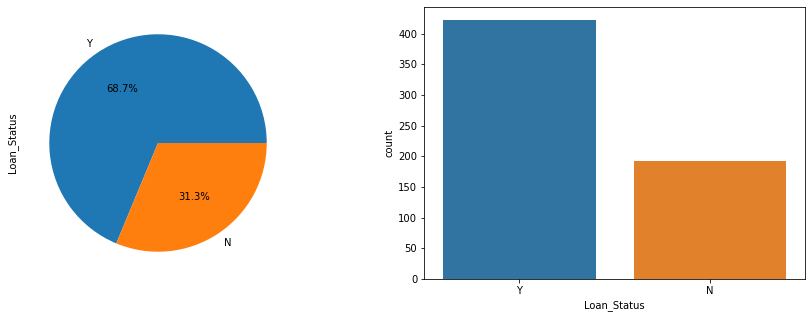

In [42]:
plt.figure(figsize=(15,5)) # size of the figure
plt.subplot(1,2,1) 
loan_status['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%') # plotting pie chart for "Loan_Status" column in the dataset 
plt.subplot(1,2,2)
sns.countplot(loan_status['Loan_Status']) # plotting count plot for "Loan_Status" column in the dataset
loan_status['Loan_Status'].value_counts()

Dataset is highly imbalanced as label class do not have eqaul count of categories.

Male      489
Female    112
Name: Gender, dtype: int64

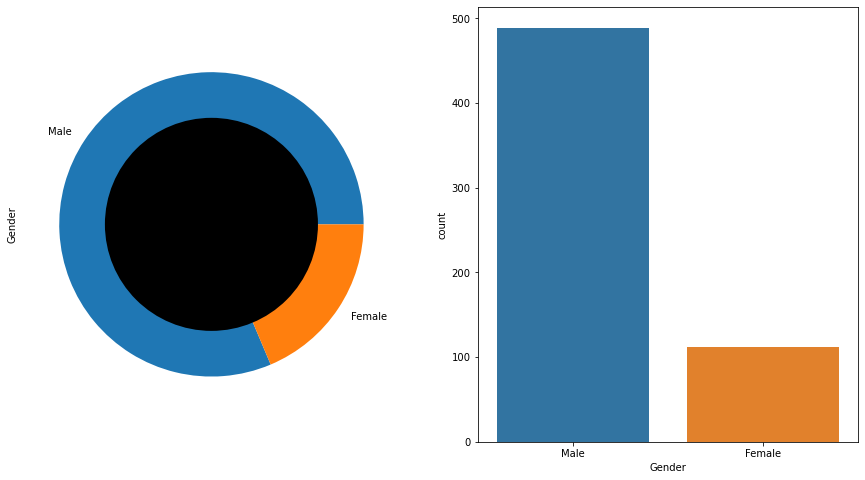

In [43]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
loan_status['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='black')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Gender',data=loan_status)
loan_status['Gender'].value_counts()

There are more no. of male applicants than female applicants, almost 4 times.

Yes    398
No     213
Name: Married, dtype: int64

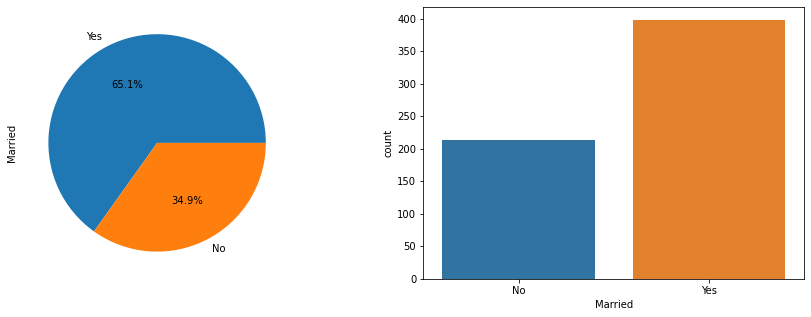

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
loan_status['Married'].value_counts().plot.pie(autopct='%1.1f%%') 
plt.subplot(1,2,2)
sns.countplot(loan_status['Married']) 
loan_status['Married'].value_counts()

There are more no. of applicants who are married than the unmarried ones.

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

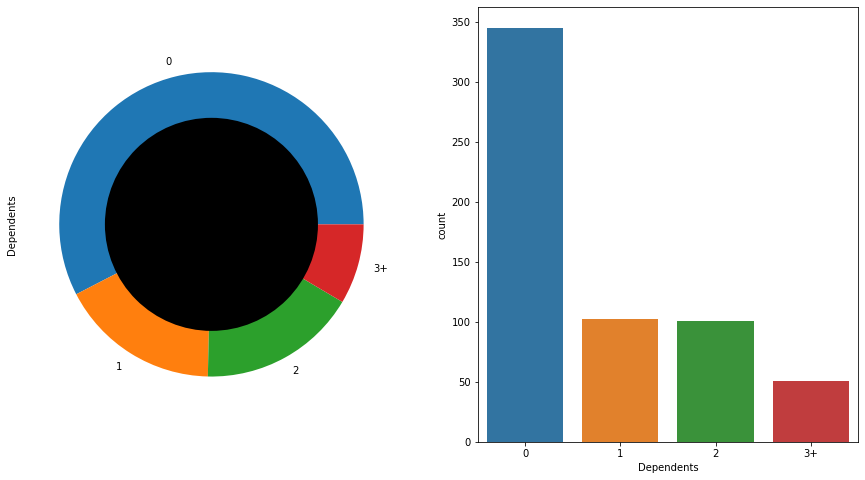

In [45]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
loan_status['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='black')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Dependents',data=loan_status)
loan_status['Dependents'].value_counts()


Most loan applicants have 0 dependents, people who have 3 or more than 3 dependes are very few.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

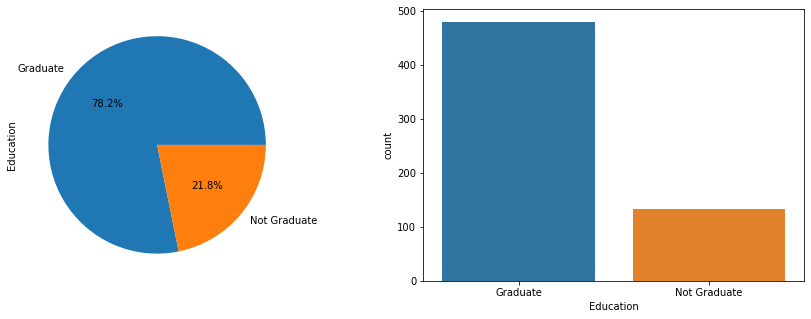

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
loan_status['Education'].value_counts().plot.pie(autopct='%1.1f%%') 
plt.subplot(1,2,2)
sns.countplot(loan_status['Education']) 
loan_status['Education'].value_counts()

There are more no. of graduate applicants than the non graduates one.

No     500
Yes     82
Name: Self_Employed, dtype: int64

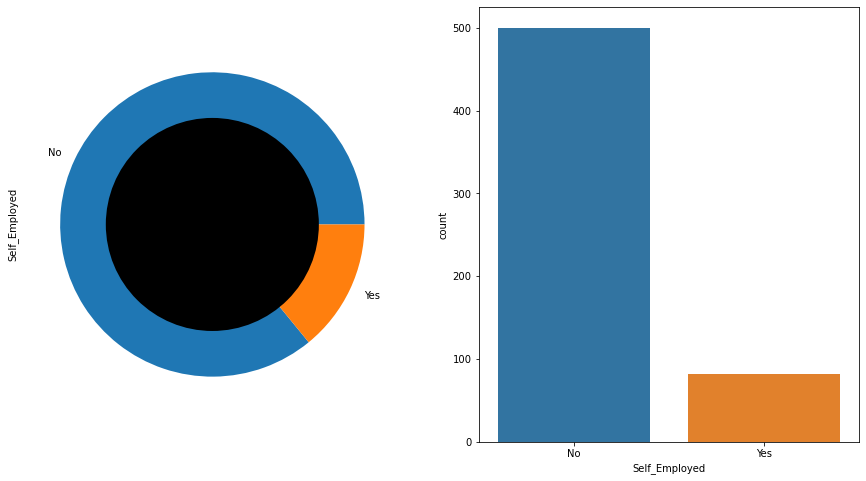

In [47]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
loan_status['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='black')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Self_Employed',data=loan_status)
loan_status['Self_Employed'].value_counts()

Self Employed people seem to apply for loan lesser than who are not self employed or this could also be that there are less no. of peple who are self employed.

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

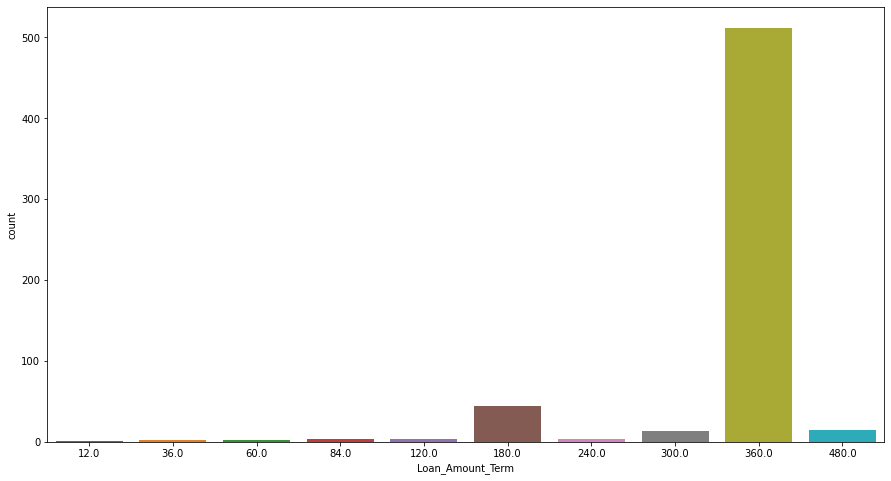

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(x='Loan_Amount_Term',data=loan_status)
loan_status['Loan_Amount_Term'].value_counts()

Most loan applicant take loan amount term of 360 while there are very few who take short loan amount term.

1.0    475
0.0     89
Name: Credit_History, dtype: int64

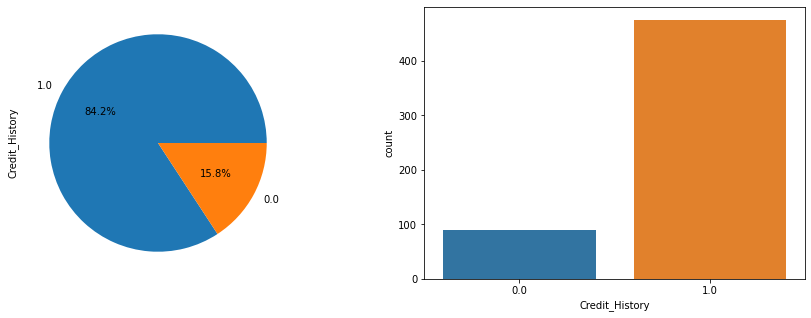

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
loan_status['Credit_History'].value_counts().plot.pie(autopct='%1.1f%%') 
plt.subplot(1,2,2)
sns.countplot(loan_status['Credit_History']) 
loan_status['Credit_History'].value_counts()

Most of the applicants who apply for loan have a good credit history

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

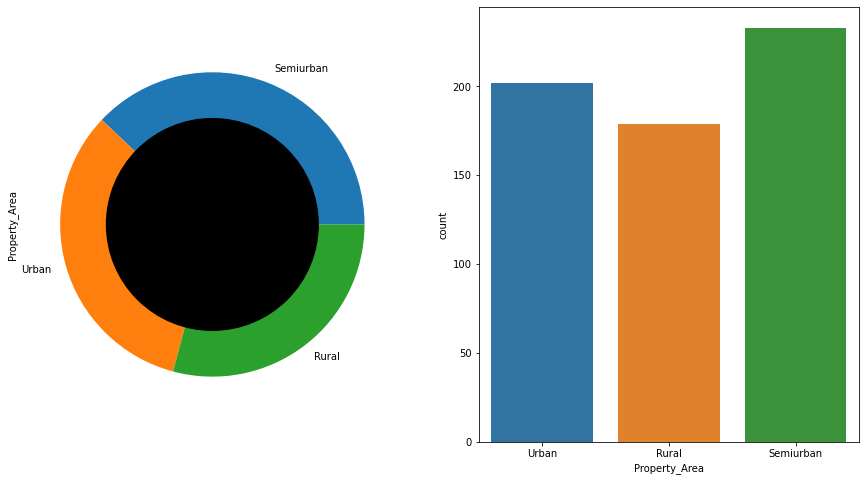

In [50]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
loan_status['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='black')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Property_Area',data=loan_status)
loan_status['Property_Area'].value_counts()

Most loan applicants live in semiurban area while the applicants from rural area are the least in no.

Minimum 150
Maximum 81000


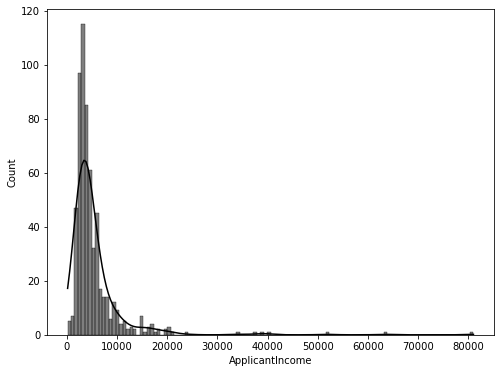

In [51]:
plt.figure(figsize=(8,6))
sns.histplot(loan_status['ApplicantIncome'],kde=True,color='k')
print('Minimum',loan_status['ApplicantIncome'].min())
print('Maximum',loan_status['ApplicantIncome'].max())

Most of the loan applicants have their income in the range 1000 to 10000 while applicants having income as low as 150 and as high as 81000 also apply for loan. Data is highly skewed to the right.

Minimum 0.0
Maximum 41667.0


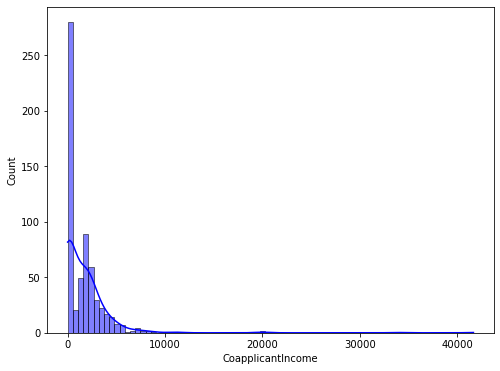

In [52]:
plt.figure(figsize=(8,6))
sns.histplot(loan_status['CoapplicantIncome'],kde=True,color='b')
print('Minimum',loan_status['CoapplicantIncome'].min())
print('Maximum',loan_status['CoapplicantIncome'].max())

Most of the loan applicants have their income in the range 0 to 5000. Income of co applicant is much lower than the applicants. Data is highly skewed to the right.

Minimum 9.0
Maximum 700.0


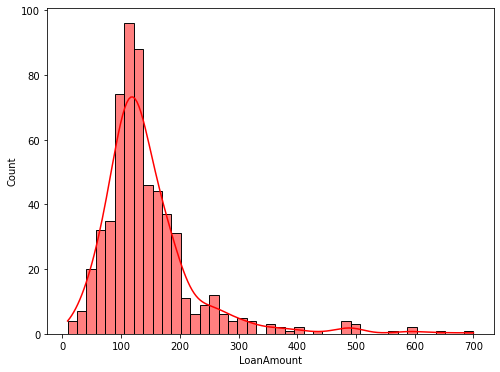

In [53]:
plt.figure(figsize=(8,6))
sns.histplot(loan_status['LoanAmount'],kde=True,color='r')
print('Minimum',loan_status['LoanAmount'].min())
print('Maximum',loan_status['LoanAmount'].max())

Loan amount varies from 9 to 700. Most of the loan amount lie in 80 to 180. Data is skewed to the right side with mean greater than the median.

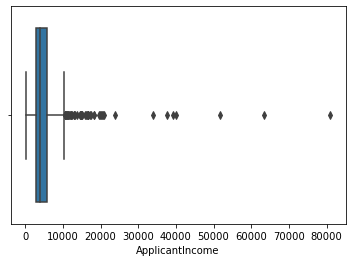

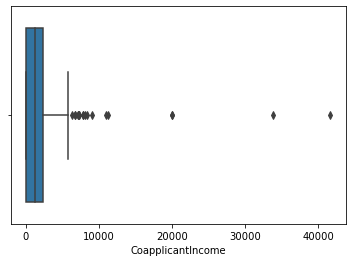

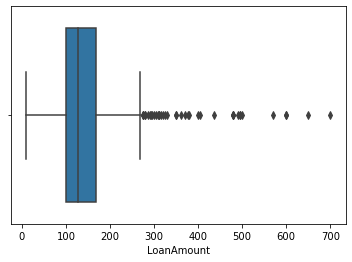

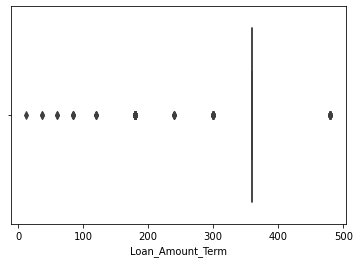

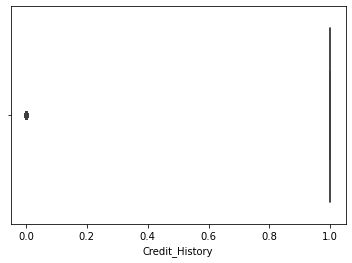

<Figure size 432x288 with 0 Axes>

In [54]:
for i in continues:
    sns.boxplot(loan_status[i])
    plt.figure()

There are outliers with highest in Loan Amount.

### Bivariate Analysis

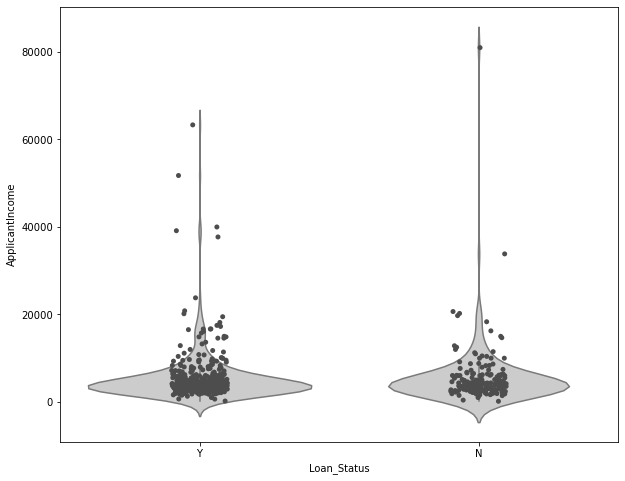

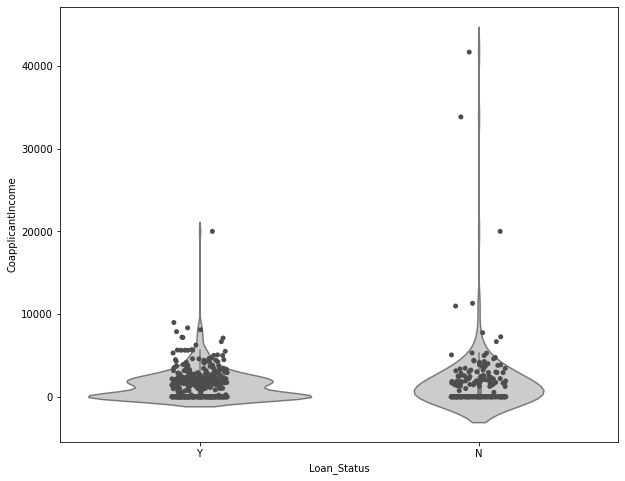

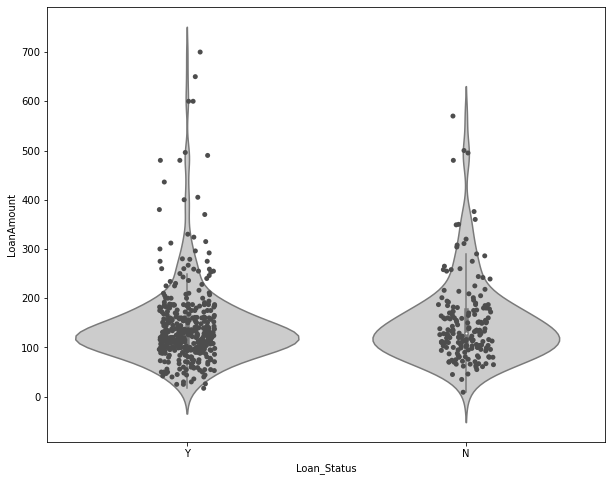

In [59]:
for i in continues:
    plt.figure(figsize=(10,8))
    ax=sns.violinplot(x='Loan_Status',y=i,data=loan_status,color=".8")
    ax=sns.stripplot(x='Loan_Status',y=i,data=loan_status,color=".3")

* There are few applications for less than 150 loan amount term and most of them are accepted. While most application are for higher terms.
* If a person have bad credit history, there are chances his loan will be rejected, whereas there are some cases where loan have been granted even after bad credit history. Also good credit history does not guarantee you a approval of loan alone.
* Loan are not granted on the basis of applicant income alone as loans are also rejected, where applicants income is very high.
* There is more density in yes category where a co applicant income is more but loan are not granted on the basis of c0-applicant income alone as loans are also rejected, where co-applicants income is very high.
* There are more no. of applicants for loan amount less than 200. Loans greater than 600 are all accepted, All over Loan amount does not concludes if a loan will be accepted or not.

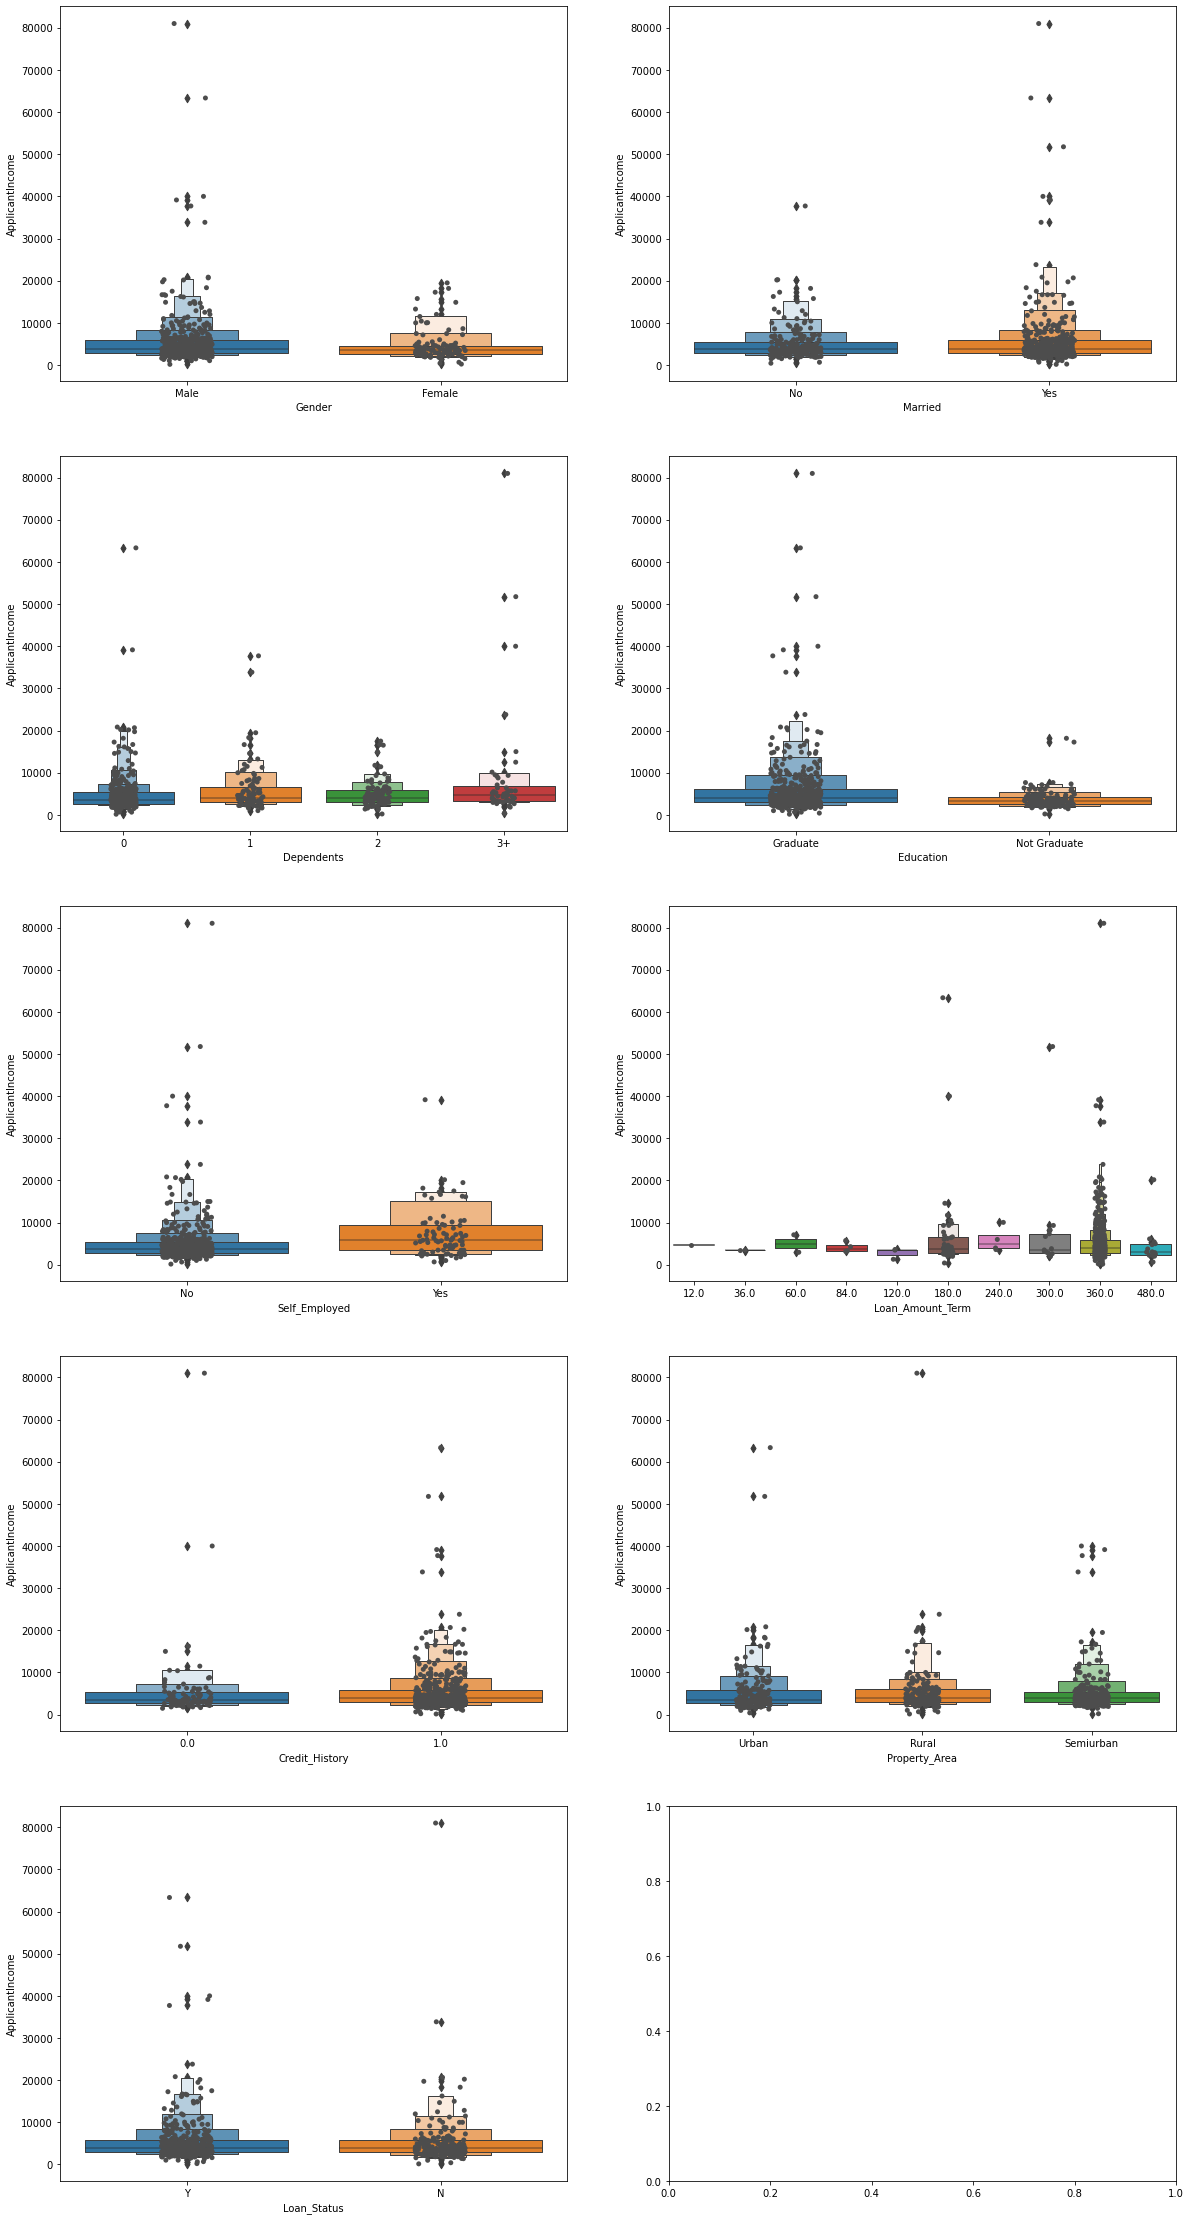

In [68]:
#ApplicantIncome vs Categorical features
fig,ax=plt.subplots(5,2,figsize=(20,40))
r=0
c=0
for i,n in enumerate(categorical):
    if i%2==0 and i>0:
        r+=1
        c=0
    graph=sns.boxenplot(x=n,y='ApplicantIncome',data=loan_status,ax=ax[r,c])
    graph=sns.stripplot(x=n,y='ApplicantIncome',data=loan_status,color=".3",ax=ax[r,c])
    c+=1

Male applicants have higher income than females, also there are more, no, of males applicants compared to females. Unmarried applicants do not take loan more than 40000, also there are more no. of married applicants. As the no. of dependents increase applicant's income seem a decrease in amount while there are large no. of outliers present. Graduates have higher incomes than no graduates and there no. is also high. Mean income of self employed is higher than the non self employed applicants but there no. is very low. Applicants, even with high salary seem to take longer loan amount terms. Most of the applicants with good credit history have higher incomes with presence of outliers. People living in rural areas seem to have highest income as compared to other areas.

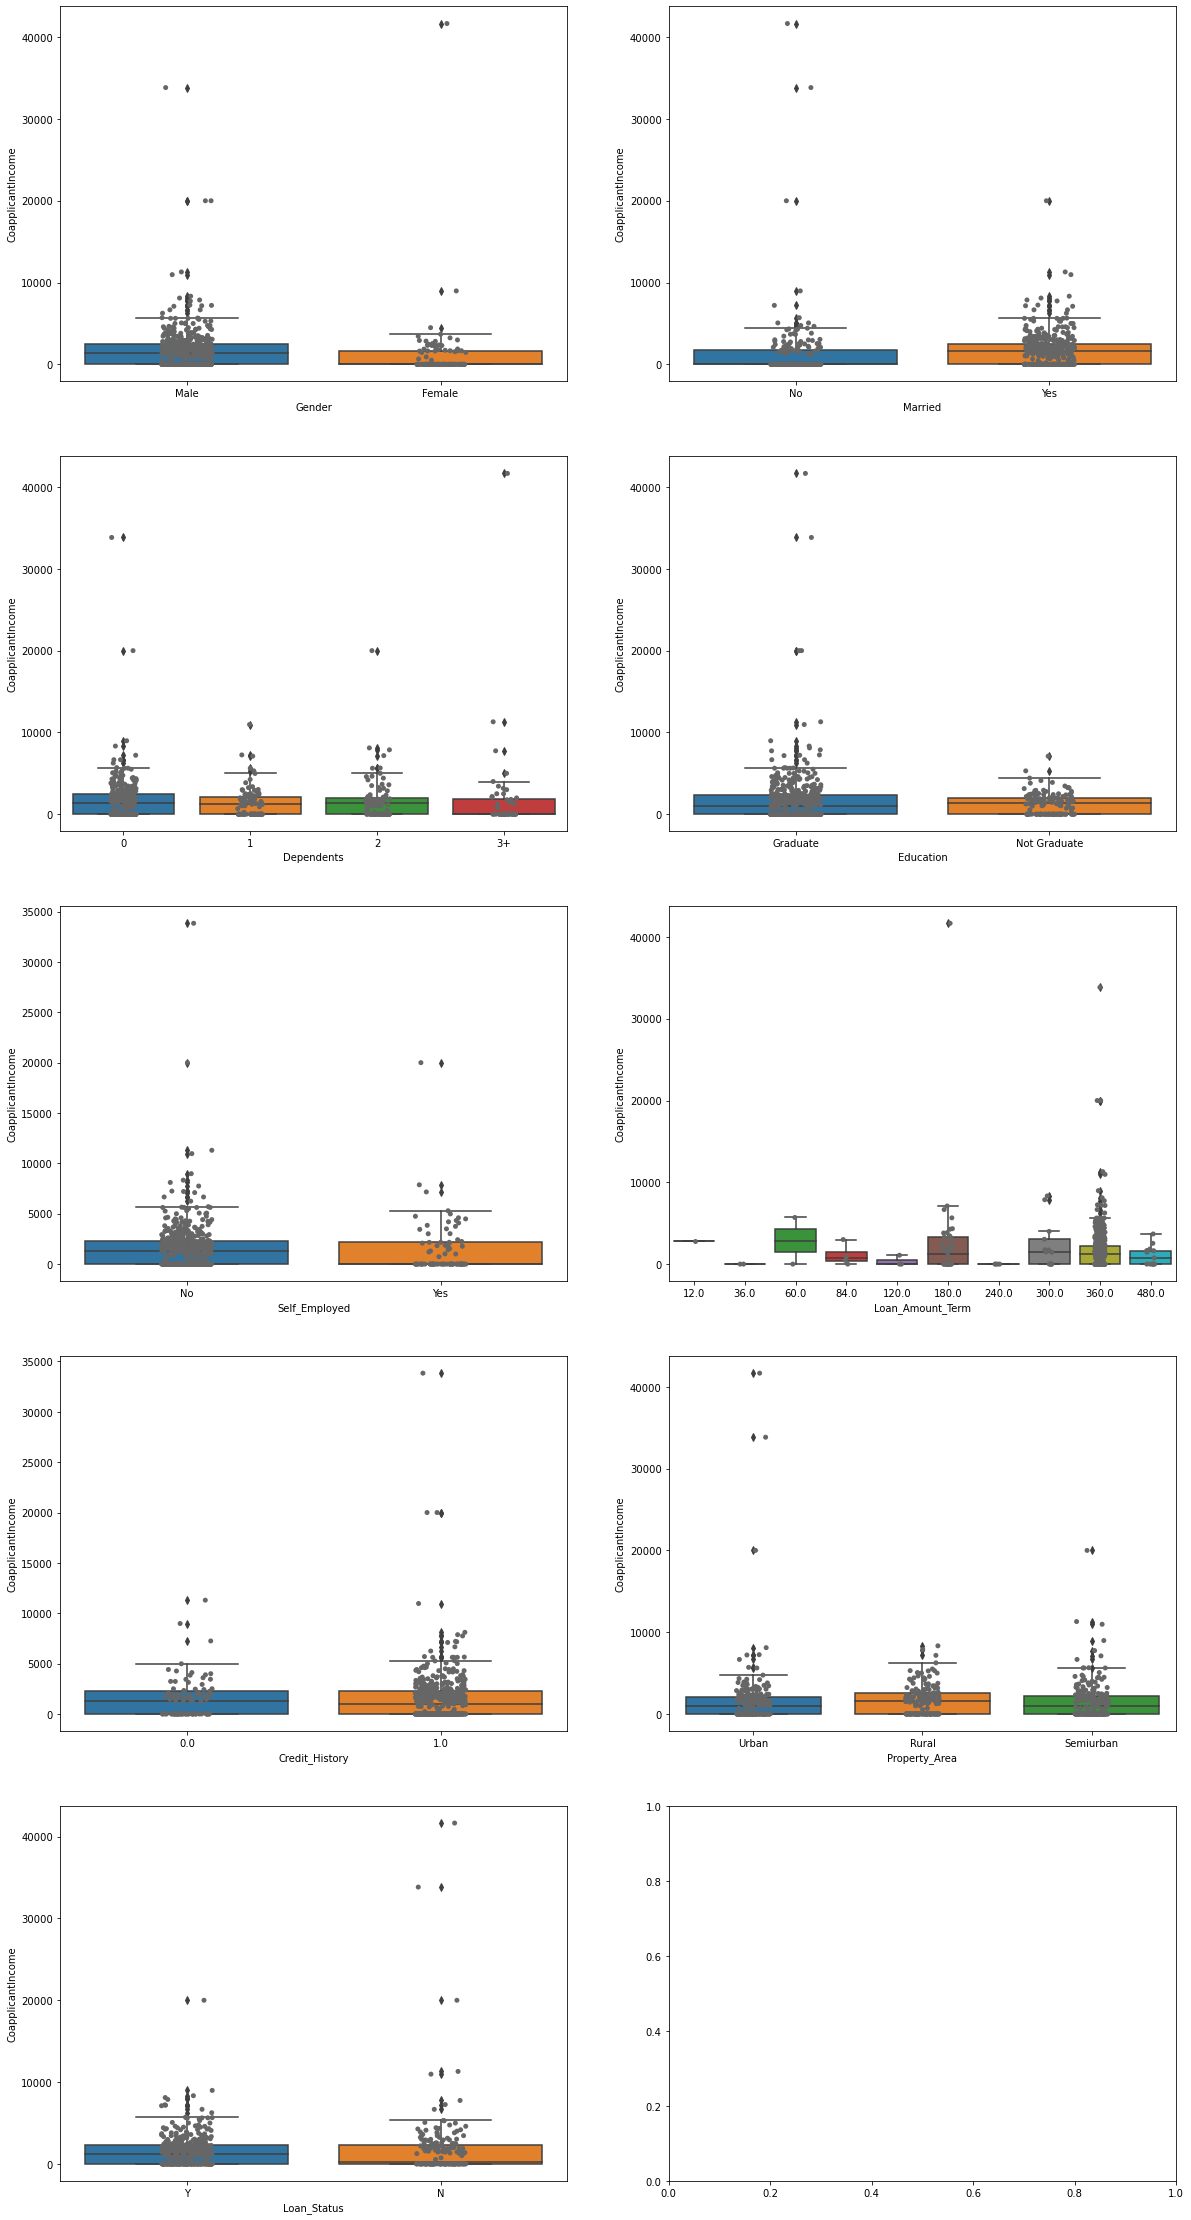

In [69]:
#CoapplicantIncome vs Categorical features
fig,ax=plt.subplots(5,2,figsize=(20,40))
r=0
c=0
for i,n in enumerate(categorical):
    if i%2==0 and i>0:
        r+=1
        c=0
    graph=sns.boxplot(x=n,y='CoapplicantIncome',data=loan_status,ax=ax[r,c])
    graph=sns.stripplot(x=n,y='CoapplicantIncome',data=loan_status,color=".4",ax=ax[r,c])
    c+=1

Male co-applicants have higher income than females, also there are more, no, of males co-applicants compared to females but here highest income is of female co applicant. Unmarried co-applicants have there salary more than the married ones. Co-Applicants income do not depend on the no, of dependents of the applicant. Graduates have higher incomes than non graduates and there no. is also high. Mean income of non self employed is higher than the non self employed co-applicants. Co-Applicants, even with high salary seem to take longer loan amount terms. Most of the co-applicants with good credit history have higher incomes with presence of outliers. People living in rural areas seem to have highest mean income as compared to other areas, while co-applicants from urban area have the highest. Loans of Co-applicants are also rejected who have salary more than 30000.

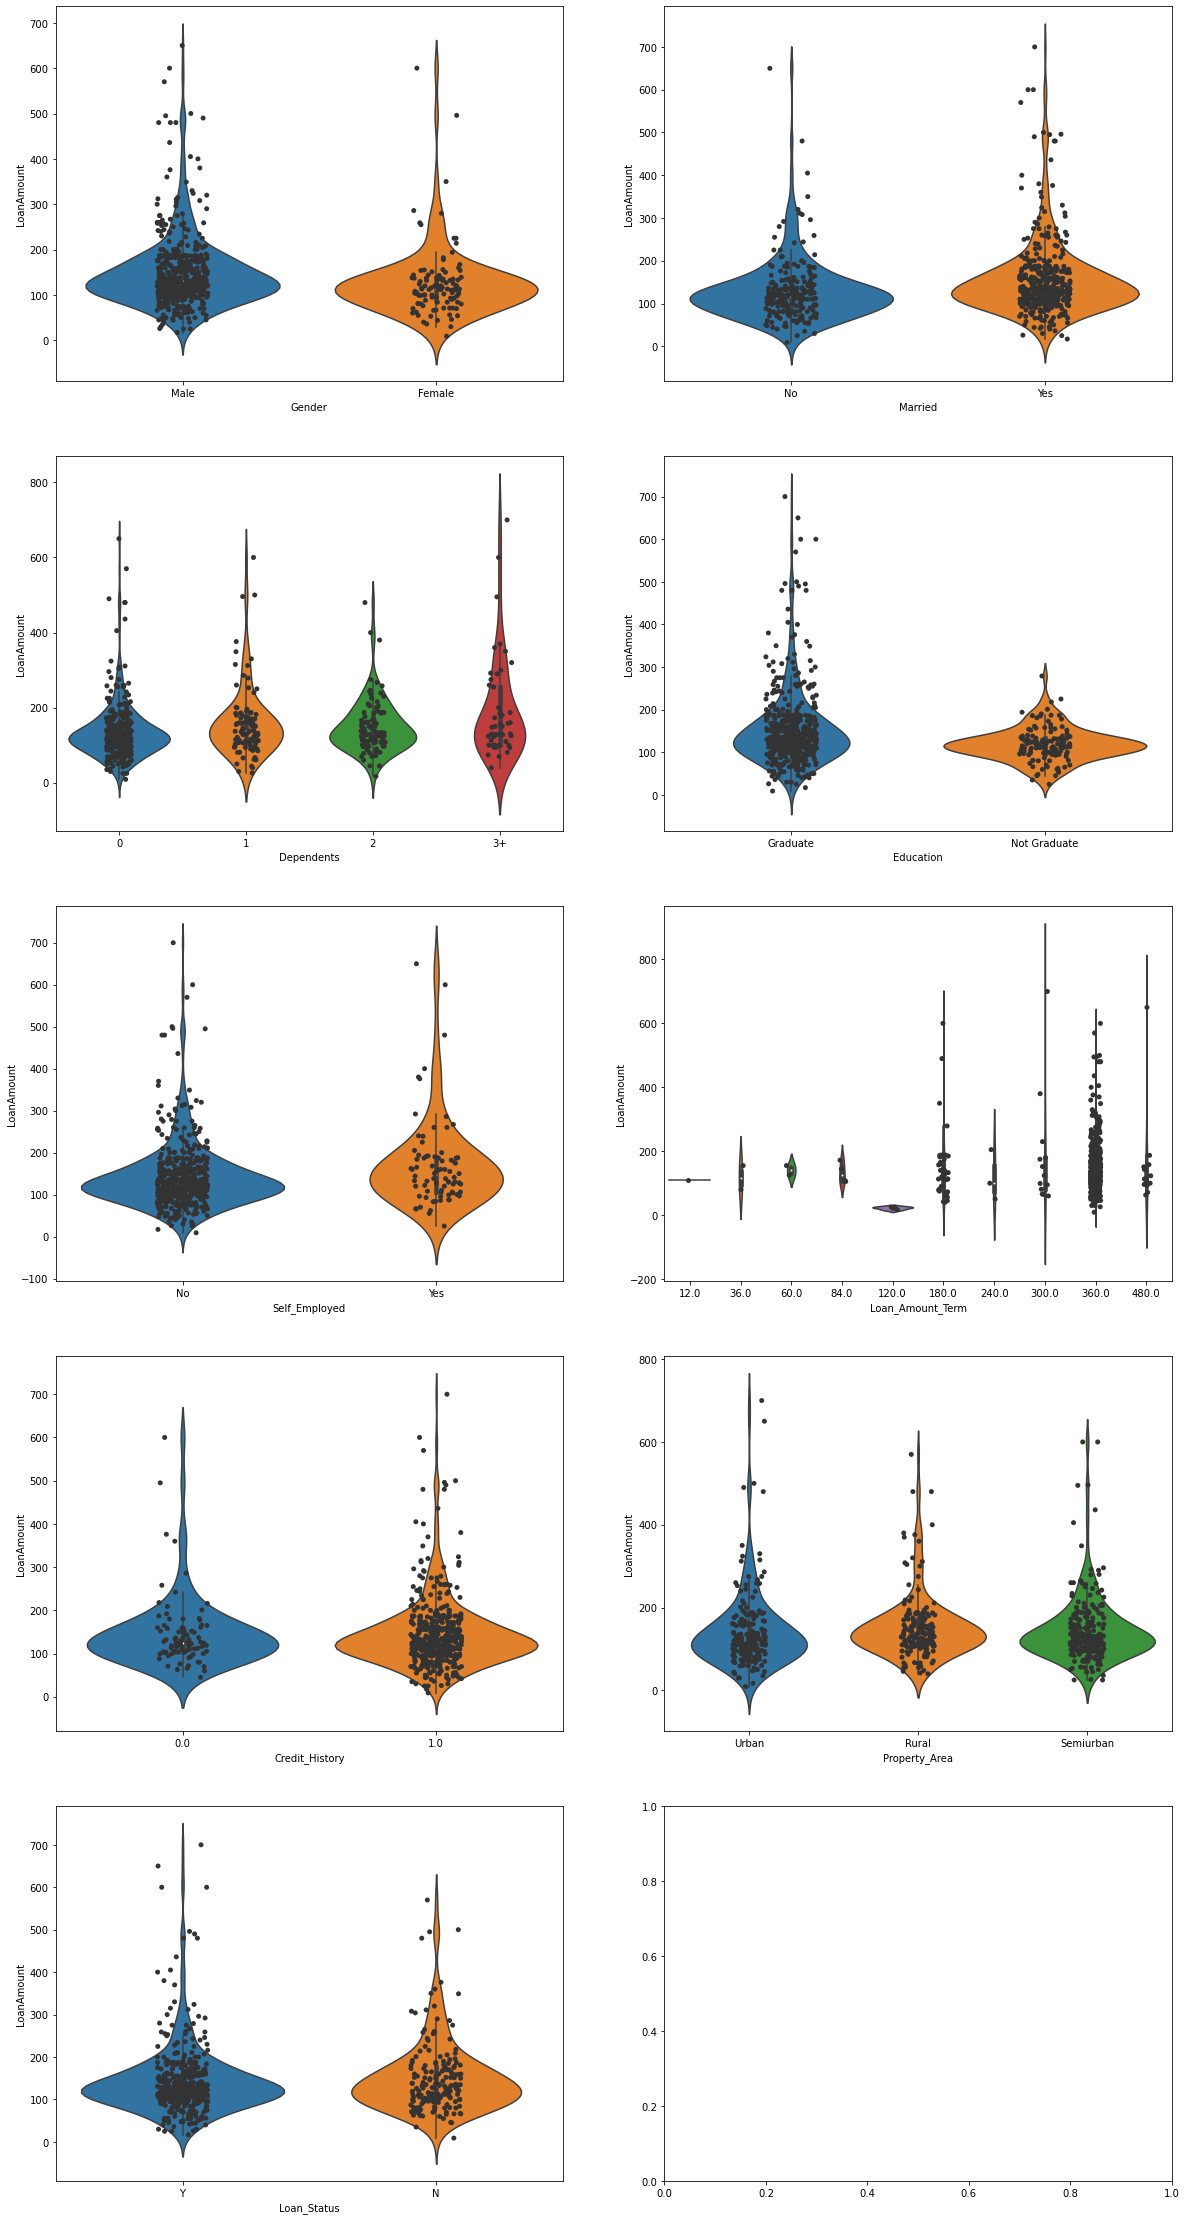

In [70]:
#LoanAmount vs Categorical features
fig,ax=plt.subplots(5,2,figsize=(20,40))
r=0
c=0
for i,n in enumerate(categorical):
    if i%2==0 and i>0:
        r+=1
        c=0
    graph=sns.violinplot(x=n,y='LoanAmount',data=loan_status,ax=ax[r,c])
    graph=sns.stripplot(x=n,y='LoanAmount',data=loan_status,color=".2",ax=ax[r,c])
    c+=1

Females usually take loans on lower amounts but ouliers are also present. Married people have mean loan amount greater than the unmarried ones. There are more applicants with 0 dependents but there mean loan amount is least compared to loan applicatns whi have dependents. Non graduates take loans on higher amounts compared to non graduates. Even though no. of non self employed applicants are more but self employed applicants apply for higher amounts of loan. Least loan amount is giver=n for loan period of 120 but usually higher loan amounts are given with greater loan amount term. People with good credit history take loan on greater amounts but presence of outliers is there. People from rural areas have mean loan amount highest while, highes loan amounts are taken by people from urban area. Loan status do not depend on Loan amount as highest amount loans are also passed and lowest amount loans are also rejected.

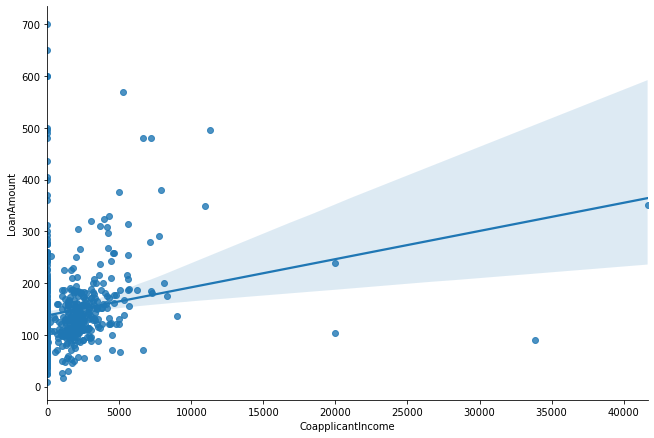

In [71]:
sns.lmplot(x='CoapplicantIncome',y='LoanAmount',data=loan_status,height=6, aspect=1.5)

As the Loan amount increases, there is also an increase in co-applicants income.

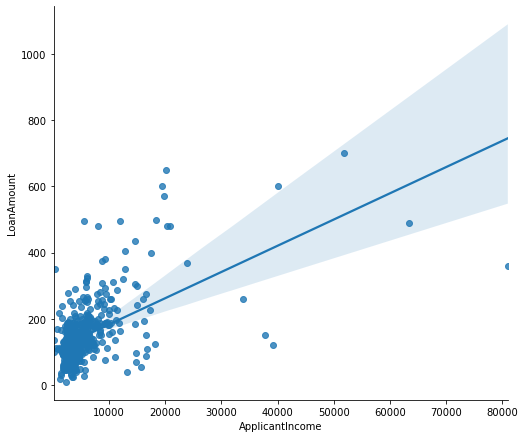

In [72]:
sns.lmplot(x='ApplicantIncome',y='LoanAmount',data=loan_status,height=6, aspect=1.2)

As the Loan amount increases, there is also an increase in Loan Applicants income.

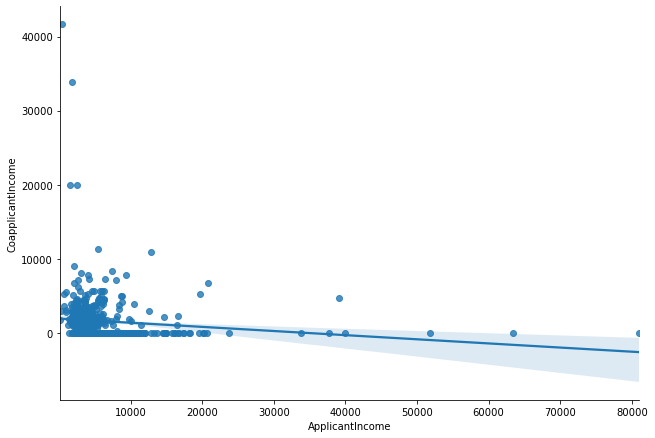

In [73]:
sns.lmplot(x='ApplicantIncome',y='CoapplicantIncome',data=loan_status,height=6, aspect=1.5)

There is a slight decrease in co applicants income as loan Applicants income increases.

## Multivariate Analysis

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

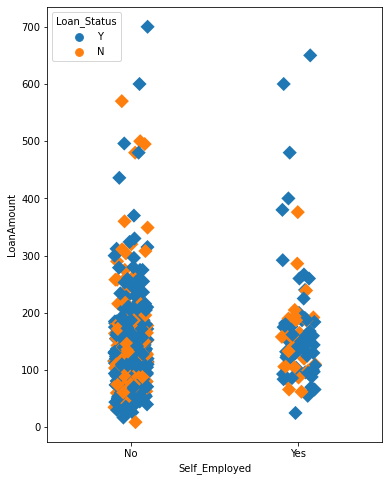

In [75]:
plt.figure(figsize=(6,8))
sns.stripplot(x='Self_Employed',y='LoanAmount',hue='Loan_Status',data=loan_status,marker='D',size=10)

Self employed people usually take higher amounts of loans as compared to non self employed ones but for loan amount more than 400 there loan status is not approved.

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

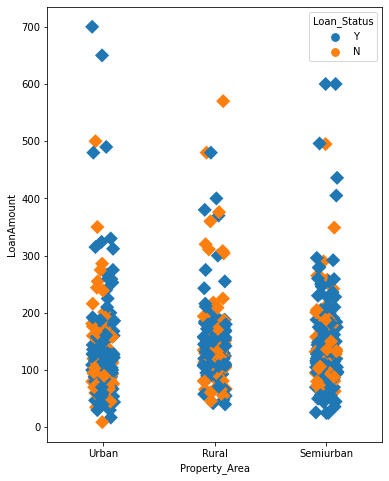

In [76]:
plt.figure(figsize=(6,8))
sns.stripplot(x='Property_Area',y='LoanAmount',hue='Loan_Status',data=loan_status,marker='D',size=10)

Most high amount approved loans are from rural area, folowed by urban, even though no. of applicants from semi urban area are more in number.

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

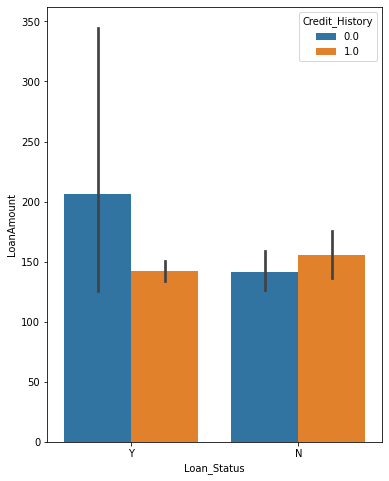

In [77]:
plt.figure(figsize=(6,8))
sns.barplot(x='Loan_Status',y='LoanAmount',hue='Credit_History',data=loan_status)

Approved loans of higher loan amount may be granted but with lower amount they are rejected even if the credit history is good.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

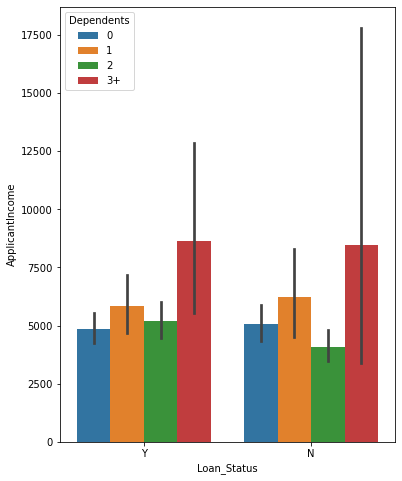

In [78]:
plt.figure(figsize=(6,8))
sns.barplot(x='Loan_Status',y='ApplicantIncome',hue='Dependents',data=loan_status)

Loan applicants incom is highest who have 3 dependents but approving of loan alone does not depend on these factors.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

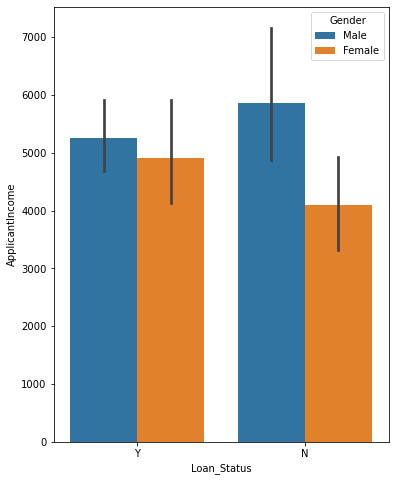

In [79]:
plt.figure(figsize=(6,8))
sns.barplot(x='Loan_Status',y='ApplicantIncome',hue='Gender',data=loan_status)

No. of female applicants having higher income are approved while this is not the case for male applicants. Even if they have higher incomes they are rejected.

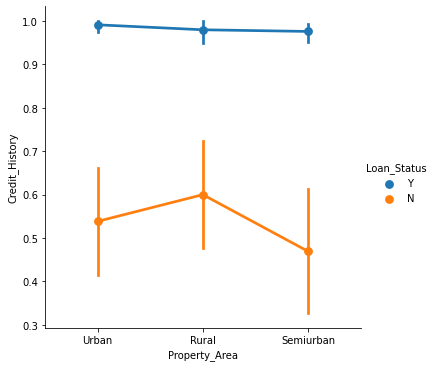

In [80]:
sns.factorplot(x='Property_Area',y='Credit_History',hue='Loan_Status',data=loan_status) 

Applicants having bad credit history are subjected to get rejected no matter from where they belong.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

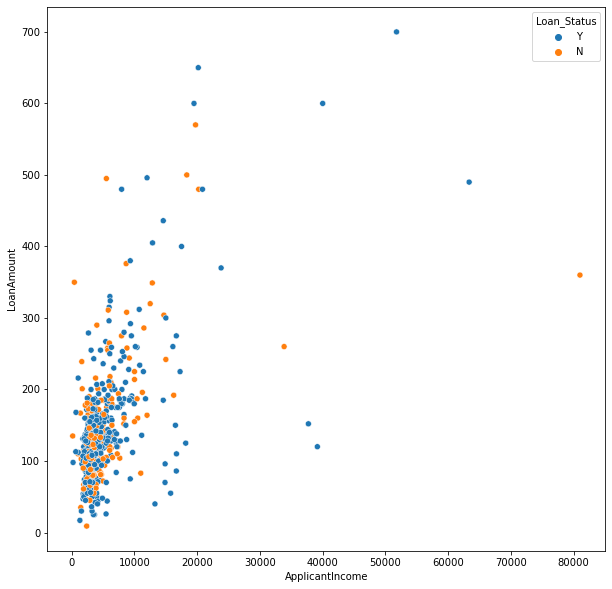

In [81]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=loan_status,hue='Loan_Status')

As the loan amount increases Applicant income also increases. but loan is not granted alone on these both relationship as higher loan amounts with lower income lso have been accepted and lower loan amount with higher applicant income are also rejected.

<AxesSubplot:>

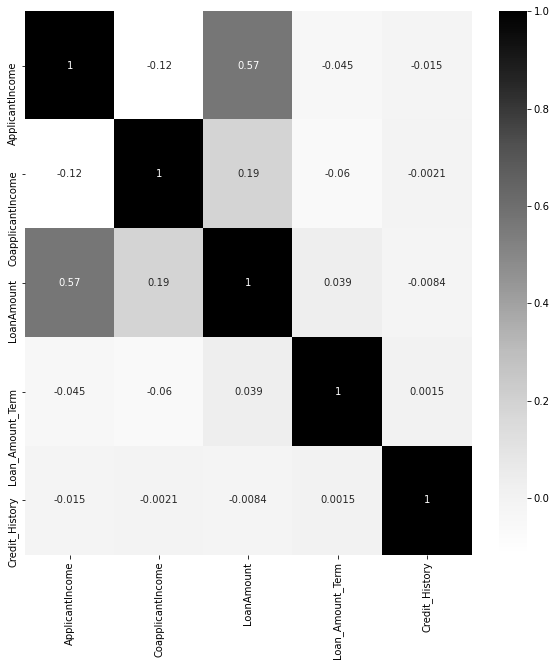

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_status.corr(),annot=True,cmap='Greys')

There is not much correlation between independent variables except for loan amount shows positive correlation with Applicants and Co-applicants income.

# Pre-processing

##### Dropping identifier columns

In [83]:
loan_status.drop('Loan_ID',axis=1,inplace=True)

##### Filling null values

In [84]:
#Imputing null values of categorical features with mode
loan_status['Gender'].fillna(loan_status['Gender'].mode()[0],inplace=True)
loan_status['Married'].fillna(loan_status['Married'].mode()[0],inplace=True)
loan_status['Dependents'].fillna(loan_status['Dependents'].mode()[0],inplace=True)
loan_status['Self_Employed'].fillna(loan_status['Self_Employed'].mode()[0],inplace=True)
loan_status['Credit_History'].fillna(loan_status['Credit_History'].mode()[0],inplace=True)
loan_status['Loan_Amount_Term'].fillna(loan_status['Loan_Amount_Term'].mode()[0],inplace=True)

In [85]:
#Imputing null value of continuos feature LoanAmount with median as high skewness is present in it.
loan_status['LoanAmount'].fillna(loan_status['LoanAmount'].median(),inplace=True)

<AxesSubplot:>

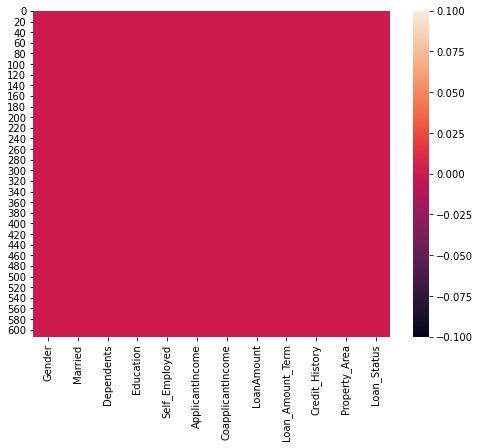

In [87]:
#checking for null values now
plt.figure(figsize=(8,6))
sns.heatmap(loan_status.isnull())

There are no more null values in the dataset now.

#### Encoding Object type columns

In [88]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
o=OrdinalEncoder()
l=LabelEncoder()

In [89]:
#We use ordinal encoder to Encode Independent features
for i in loan_status.columns:
    if loan_status[i].dtypes=='O' and i!='Loan_Status':
        loan_status[i]=o.fit_transform(loan_status[i].values.reshape(-1,1))

In [90]:
#We use label encoder to encode label 
loan_status['Loan_Status']=l.fit_transform(loan_status['Loan_Status'])

#### Removing Outliers

In [91]:
#Function to choose the right threshold 
def threhold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))

In [92]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(loan_status))
threhold(z,loan_status)

With threshold 3.0 data loss is 6.03%
With threshold 3.2 data loss is 5.37%
With threshold 3.4 data loss is 5.37%
With threshold 3.6 data loss is 4.72%
With threshold 3.8 data loss is 4.72%
With threshold 4.0 data loss is 4.23%
With threshold 4.2 data loss is 3.26%
With threshold 4.4 data loss is 2.77%
With threshold 4.6 data loss is 2.77%
With threshold 4.8 data loss is 2.28%


In [93]:
#We use threshold as 3.6 because data is expensive and we already have less of data.
loan_status=loan_status[(z<3.6).all(axis=1)]

#### Removing skewness

In [94]:
for i in continues:
    print(i,loan_status[i].skew())

ApplicantIncome 2.269125322469563
CoapplicantIncome 1.535617215156561
LoanAmount 1.4248952920837


In [95]:
loan_status['CoapplicantIncome']=np.cbrt(loan_status['CoapplicantIncome'])
loan_status['LoanAmount']=np.cbrt(loan_status['LoanAmount'])
loan_status['ApplicantIncome']=np.log(loan_status['ApplicantIncome'])

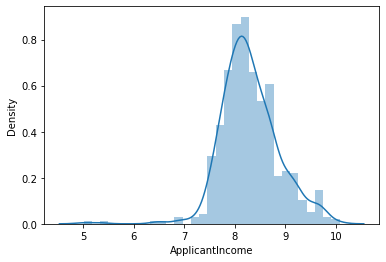

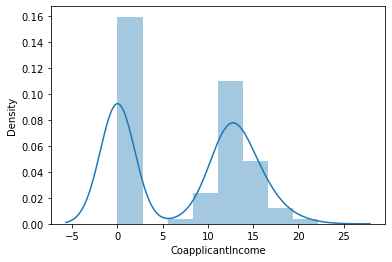

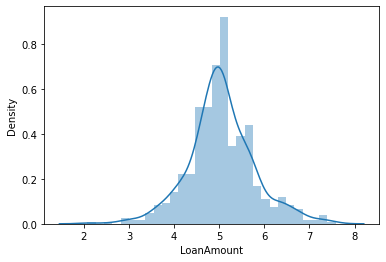

<Figure size 432x288 with 0 Axes>

In [96]:
for i in continues:
    sns.distplot(loan_status[i])
    plt.figure()

Skewness has reduced as shown in the above distribution plot.

In [97]:
#Separating dependent and independent features.
x=loan_status.copy()
x.drop('Loan_Status',axis=1,inplace=True)
y=loan_status['Loan_Status']

### Handling Imbalanced Data

In [98]:
#Oversampling using Smote
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [99]:
x,y=over.fit_resample(x,y)

1    405
0    405
Name: Loan_Status, dtype: int64

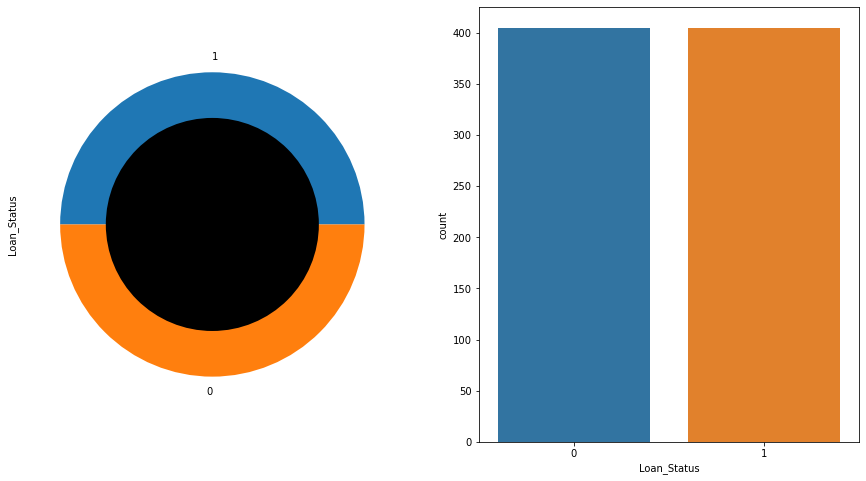

In [100]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='black')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

Data is balanced now, both the category of income have 50% data each.

### Scaling the dataset

In [101]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [102]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Modelling Phase

#### Importing neccessary libraries

In [103]:
from sklearn.model_selection import train_test_split,cross_val_score

In [111]:
#We import Classification Models
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [112]:
#importing metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [113]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=1000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [114]:
#Creating a list of models which will be created one by one
models=[GaussianNB(),KNeighborsClassifier(),SVC(probability=True),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

names=['GaussianNB','KNeighborsClassifier','SVC','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier',
       'XGBClassifier']

In [115]:
#Creating methord for the models and appending them to data frame

def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.25,random_state=randomstate(independent,dependent))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    acc=[]
    ars=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
        acc.append(np.round(accuracy_score(p,ytest),4))
        ars.append(np.round(roc_auc_score(ytest,model.predict_proba(xtest)[:,1]),4))
        
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data['Accuracy']=acc
    data['AUC_ROC Score']=ars
    data.set_index('Model',inplace = True)
    return data

In [116]:
createmodels(models,x,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score,Accuracy,AUC_ROC Score
Model,,,,,,,
GaussianNB,0.2118,0.2118,0.4602,0.01,0.7407,0.7882,0.8568
KNeighborsClassifier,0.2069,0.2069,0.4549,0.17,0.7741,0.7931,0.8627
SVC,0.1921,0.1921,0.4383,0.13,0.7580,0.8079,0.8899
LogisticRegression,0.2118,0.2118,0.4602,0.06,0.7407,0.7882,0.8635
DecisionTreeClassifier,0.1970,0.1970,0.4439,0.21,0.7827,0.8030,0.8021
RandomForestClassifier,0.1330,0.1330,0.3647,0.47,0.8469,0.8670,0.9232
AdaBoostClassifier,0.1823,0.1823,0.4269,0.26,0.7728,0.8177,0.9018
GradientBoostingClassifier,0.1330,0.1330,0.3647,0.46,0.7951,0.8670,0.9166
XGBClassifier,0.1576,0.1576,0.3970,0.37,0.8198,0.8424,0.9155


Random Forest, Gradient Boost and Xtreme Gradient Boosting gives the highest performace so we apply Hyperparameter tunning on them.

### Hyperparameter Tuning

In [117]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [119]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

#### Random Forest

In [120]:
params={'n_estimators':[100, 200, 300, 400, 500],
            'criterion':['gini','entropty'],
            'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
           'max_features':['int','float','auto','log2']}

g=GridSearchCV(RandomForestClassifier(),params,cv=10)

g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropty'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['int', 'float', 'auto', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [121]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}
RandomForestClassifier(max_depth=10)
0.8137978142076504


In [124]:
m=RandomForestClassifier(max_depth=10)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [125]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))
print('AUC_ROC Score is',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
print('Accuracy is',np.round(accuracy_score(p,ytest),4))

Mean Absolute Error is 0.1232
Mean Squared Error is 0.1232
Root Mean Squared Error is 0.3509
R2 Score is 50.39
Mean of cross validaton Score is 83.3333
AUC_ROC Score is 0.9302
Accuracy is 0.8768


#### Gradient Boost

In [126]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

g=RandomizedSearchCV(GradientBoostingClassifier(),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [127]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1}
GradientBoostingClassifier(max_depth=10, n_estimators=500, subsample=0.5)
0.8022677595628416


In [128]:
m=GradientBoostingClassifier(max_depth=10, n_estimators=500, subsample=0.5)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [129]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))
print('AUC_ROC Score is',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
print('Accuracy is',np.round(accuracy_score(p,ytest),4))

Mean Absolute Error is 0.1576
Mean Squared Error is 0.1576
Root Mean Squared Error is 0.397
R2 Score is 36.94
Mean of cross validaton Score is 84.321
AUC_ROC Score is 0.914
Accuracy is 0.8424


#### Xtreme Gradient Boost

In [130]:
params={
 "learning_rate"    : [0.01,0.05, 0.10, 0.15, ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

g=GridSearchCV(XGBClassifier(),params,cv=10)

g.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [131]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.8202732240437159


In [132]:
m=XGBClassifier(colsample_bytree=0.3, gamma=0.0, learning_rate= 0.05, max_depth=5, min_child_weight= 1)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [133]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))
print('AUC_ROC Score is',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
print('Accuracy is',np.round(accuracy_score(p,ytest),4))

Mean Absolute Error is 0.1133
Mean Squared Error is 0.1133
Root Mean Squared Error is 0.3366
R2 Score is 54.190000000000005
Mean of cross validaton Score is 82.5926
AUC_ROC Score is 0.9301
Accuracy is 0.8867


The best model for our problem id XGBClassifier as it gives a good cross validation score and difference between its cross validation score and accuracy score is minimum.

# Finalizing the best Model

In [134]:
model=XGBClassifier(colsample_bytree=0.3, gamma=0.0, learning_rate= 0.05, max_depth=5, min_child_weight= 1)
model.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

### Evaluation Metrics

In [135]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))
print('AUC_ROC Score is',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
print('Accuracy is',np.round(accuracy_score(p,ytest),4))

Mean Absolute Error is 0.1133
Mean Squared Error is 0.1133
Root Mean Squared Error is 0.3366
R2 Score is 54.190000000000005
Mean of cross validaton Score is 82.5926
AUC_ROC Score is 0.9301
Accuracy is 0.8867


In [136]:
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))

Confusion Matrix
[[87  4]
 [19 93]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        91
           1       0.96      0.83      0.89       112

    accuracy                           0.89       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.90      0.89      0.89       203



# Saving the model

In [137]:
import joblib
joblib.dump(model,'loan_status.obj')

['loan_status.obj']